    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

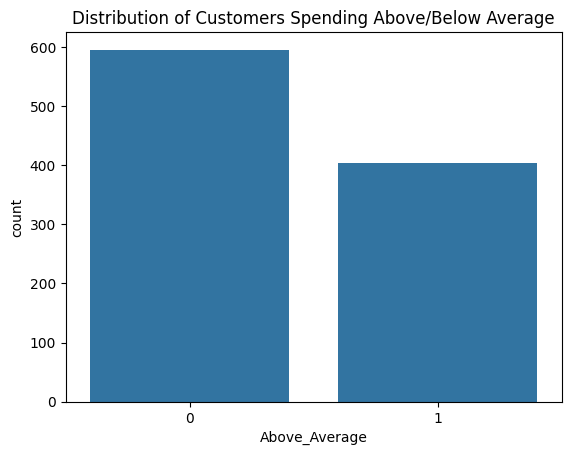

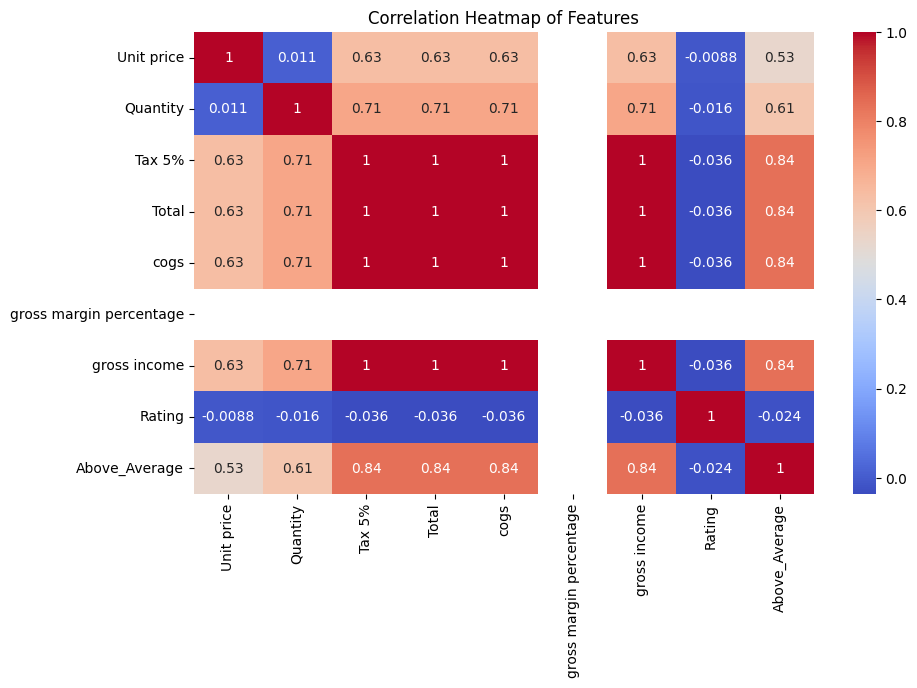

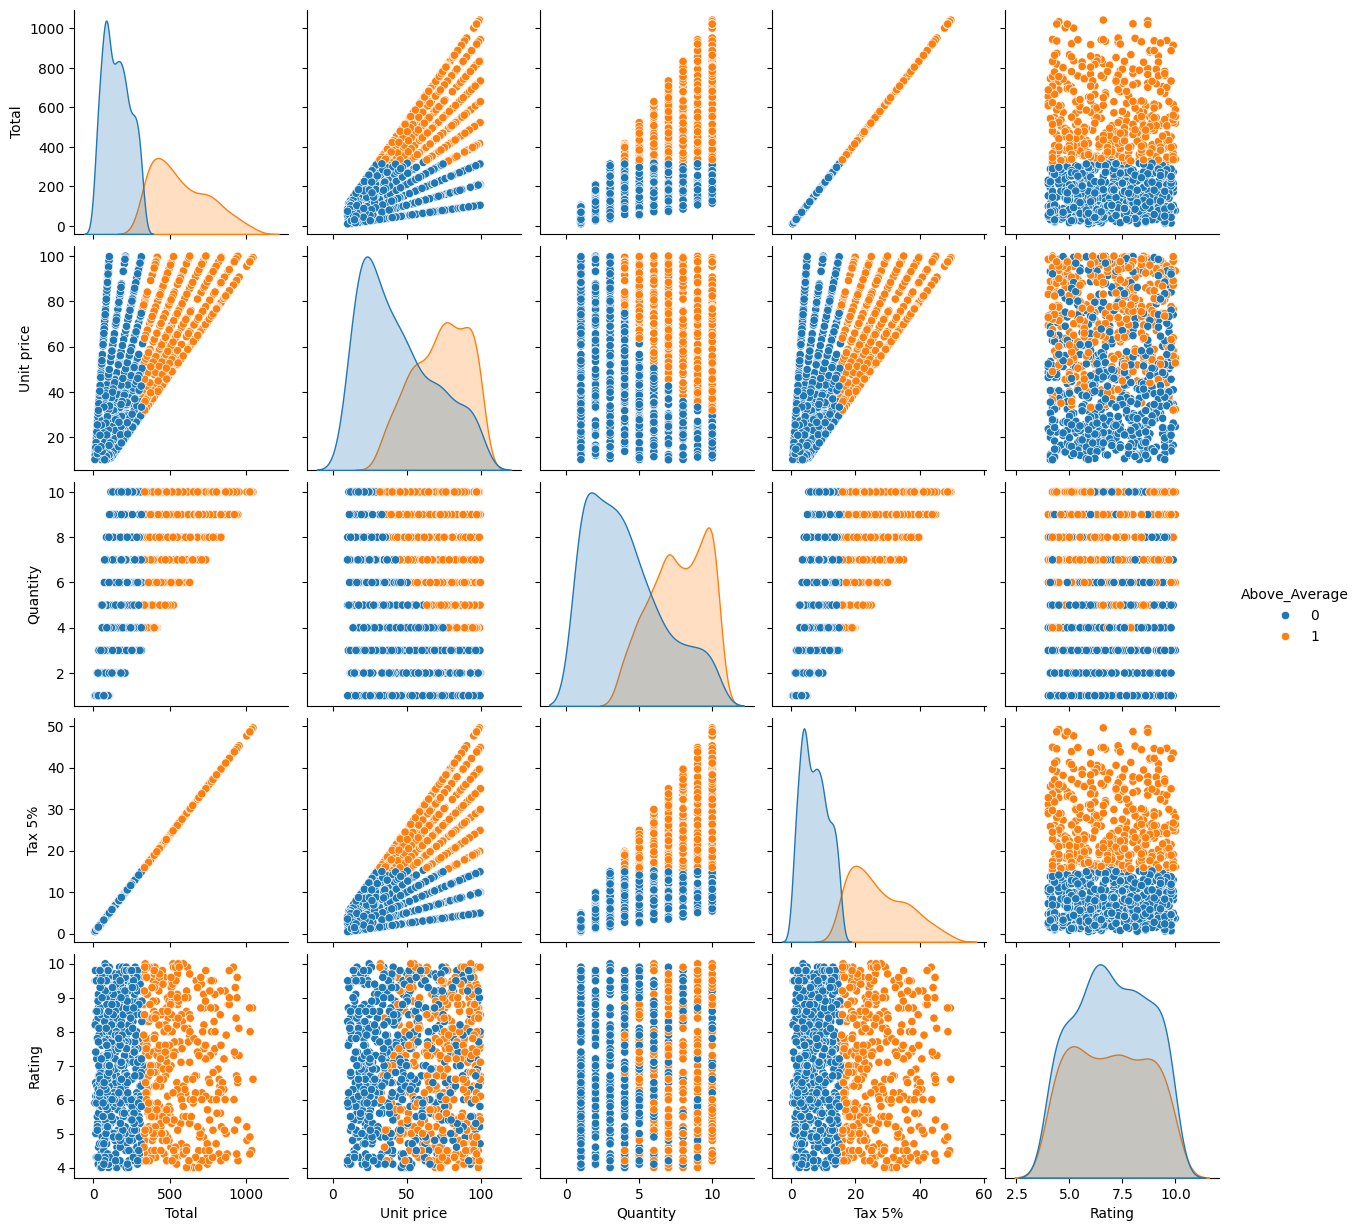

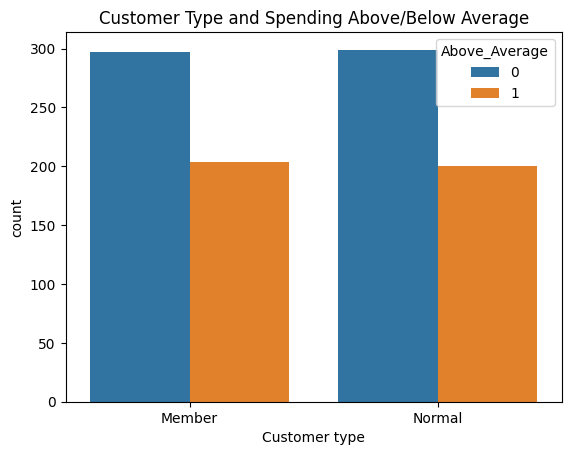

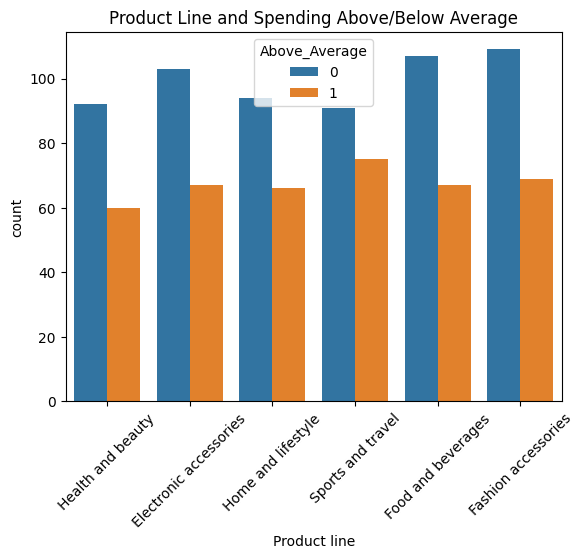

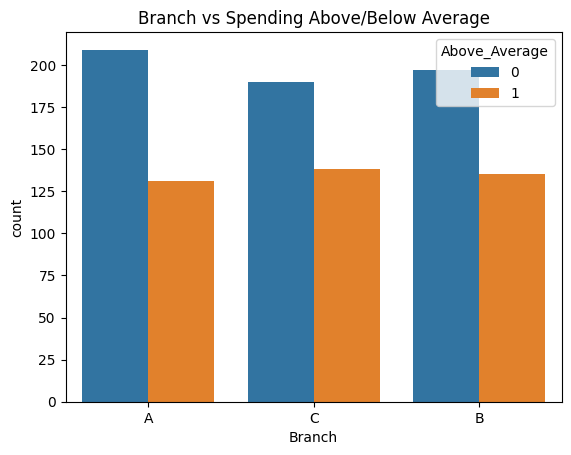

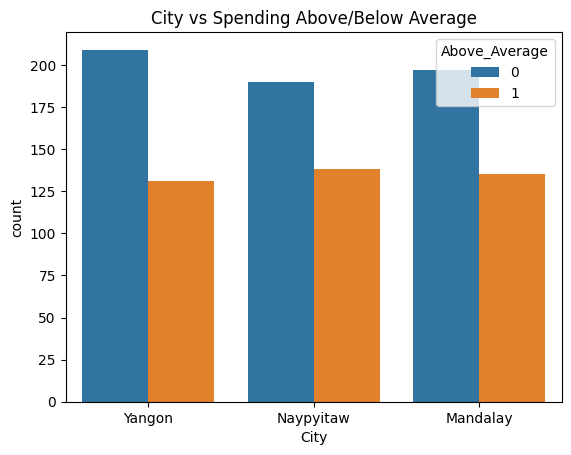

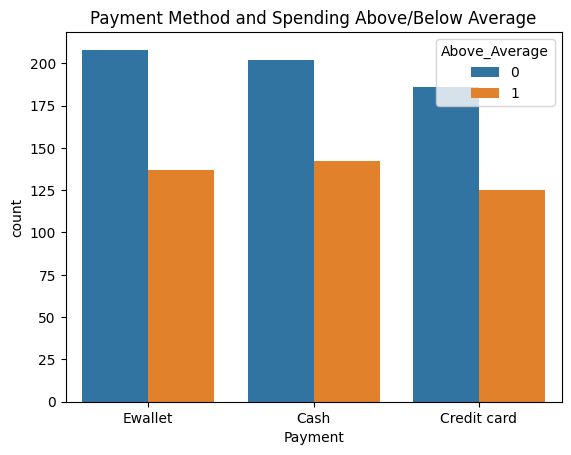

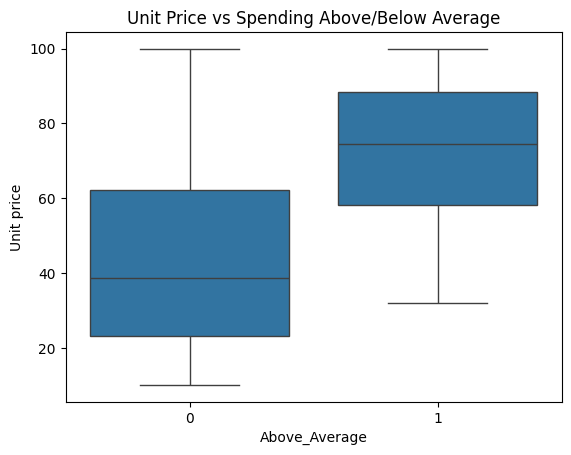

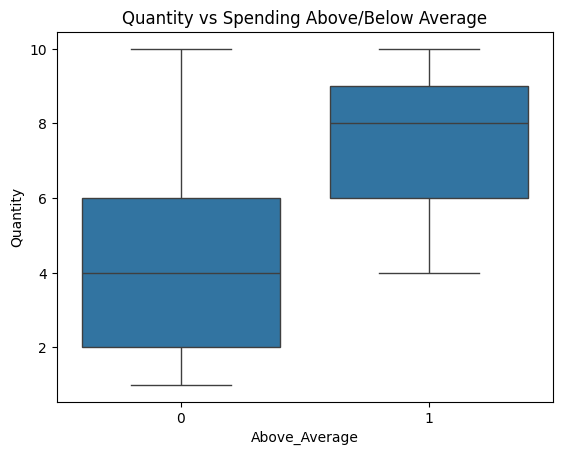

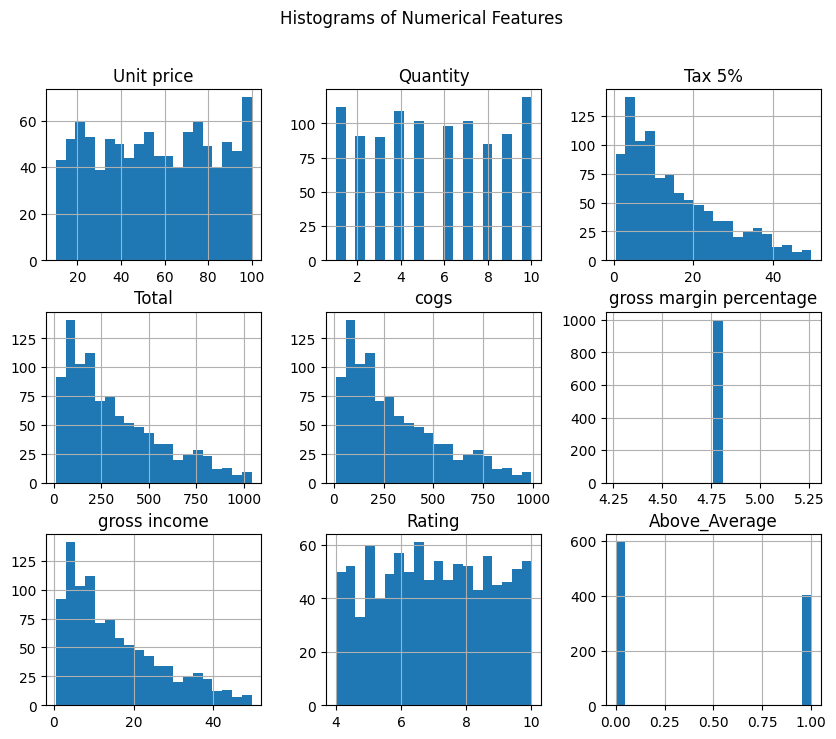

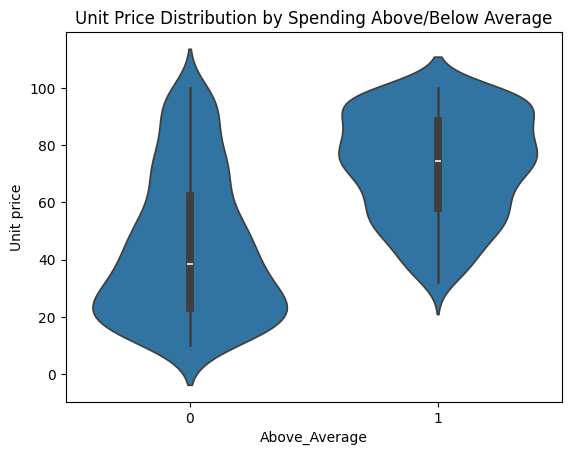

      Feature        VIF
0  Unit price  13.295384
1    Quantity  13.789474
2      Tax 5%  16.131310
3      Rating  10.921189
Accuracy: 0.97
Precision: 0.99
Recall: 0.94
F1 Score: 0.96
ROC AUC: 0.97
Tax 5%                             6.136005
Quantity                           1.985088
Unit price                         1.685780
Customer type_Normal               0.233247
Product line_Sports and travel     0.172073
Payment_Credit card                0.170978
City_Yangon                        0.057173
Branch_B                           0.004744
Rating                            -0.013809
Product line_Home and lifestyle   -0.025551
dtype: float64


In [3]:
import os

# Create 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

## Load and Explore the Dataset
import pandas as pd

# Load dataset
data = pd.read_csv('./data/supermarket_sales.csv')

# Display the first few rows of the dataset
print(data.head())
print('---')
print('---')

# Check for missing values and datatypes
print(data.info())
print('---')
print('---')

# Describe the numerical features
print(data.describe())

## Target Definition
# Calculate the average transaction value
average_transaction_value = data['Total'].mean()

# Create the target variable: 1 if 'Total' is above average, 0 if below
data['Above_Average'] = (data['Total'] > average_transaction_value).astype(int)

## EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Check the distribution of the target variable
sns.countplot(x='Above_Average', data=data)
plt.title('Distribution of Customers Spending Above/Below Average')
plt.savefig('images/distribution_above_below_average.png')  # Save the plot
plt.show()

# Select numerical columns
numerical_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.savefig('images/correlation_heatmap.png')  # Save the plot
plt.show()

# Selecting important features for pairplot
important_features = ['Total', 'Unit price', 'Quantity', 'Tax 5%', 'Rating', 'Above_Average']

sns.pairplot(data[important_features], hue='Above_Average')
plt.savefig('images/pairplot.png')  # Save the plot
plt.show()

# Distribution of spending across 'Customer type'
sns.countplot(x='Customer type', hue='Above_Average', data=data)
plt.title('Customer Type and Spending Above/Below Average')
plt.savefig('images/customer_type_spending.png')  # Save the plot
plt.show()

# Distribution of spending across 'Product line'
sns.countplot(x='Product line', hue='Above_Average', data=data)
plt.title('Product Line and Spending Above/Below Average')
plt.xticks(rotation=45)
plt.savefig('images/product_line_spending.png')  # Save the plot
plt.show()

# Spending distribution across Branches
sns.countplot(x='Branch', hue='Above_Average', data=data)
plt.title('Branch vs Spending Above/Below Average')
plt.savefig('images/branch_spending.png')  # Save the plot
plt.show()

# Spending distribution across Cities
sns.countplot(x='City', hue='Above_Average', data=data)
plt.title('City vs Spending Above/Below Average')
plt.savefig('images/city_spending.png')  # Save the plot
plt.show()

# Payment Method vs Spending
sns.countplot(x='Payment', hue='Above_Average', data=data)
plt.title('Payment Method and Spending Above/Below Average')
plt.savefig('images/payment_method_spending.png')  # Save the plot
plt.show()

# Boxplot for 'Unit price' across target
sns.boxplot(x='Above_Average', y='Unit price', data=data)
plt.title('Unit Price vs Spending Above/Below Average')
plt.savefig('images/unit_price_boxplot.png')  # Save the plot
plt.show()

# Boxplot for 'Quantity' across target
sns.boxplot(x='Above_Average', y='Quantity', data=data)
plt.title('Quantity vs Spending Above/Below Average')
plt.savefig('images/quantity_boxplot.png')  # Save the plot
plt.show()

# Additional EDA: Histograms of numerical variables
numerical_data.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.savefig('images/numerical_histograms.png')  # Save the plot
plt.show()

# Additional EDA: Violin plot for Unit Price
sns.violinplot(x='Above_Average', y='Unit price', data=data)
plt.title('Unit Price Distribution by Spending Above/Below Average')
plt.savefig('images/unit_price_violin.png')  # Save the plot
plt.show()

## Preprocessing
# One-Hot Encode categorical variables
data_encoded = pd.get_dummies(data[['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']], drop_first=True)

# Combine with numerical features
X = pd.concat([data_encoded, data[['Unit price', 'Quantity', 'Tax 5%', 'Rating']]], axis=1)
y = data['Above_Average']  # Consistent naming

# Check for multicollinearity (optional)
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_X = X.select_dtypes(include=['number'])
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_X.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_X.values, i) for i in range(numeric_X.shape[1])]
print(vif_data)

# Split the data into training and testing sets (80/20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline that scales the data and then fits the model
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

## Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')

## Feature Importance
# Extract feature importance
importance = pd.Series(pipeline.named_steps['logisticregression'].coef_[0], index=X.columns)
importance_sorted = importance.sort_values(ascending=False)

# Display the most important features
print(importance_sorted.head(10))

In [4]:
importance_sorted

Tax 5%                              6.136005
Quantity                            1.985088
Unit price                          1.685780
Customer type_Normal                0.233247
Product line_Sports and travel      0.172073
Payment_Credit card                 0.170978
City_Yangon                         0.057173
Branch_B                            0.004744
Rating                             -0.013809
Product line_Home and lifestyle    -0.025551
Branch_C                           -0.062053
City_Naypyitaw                     -0.062053
Product line_Health and beauty     -0.064831
Gender_Male                        -0.077881
Product line_Food and beverages    -0.087151
Payment_Ewallet                    -0.154661
Product line_Fashion accessories   -0.325914
dtype: float64